Imports & basic setup

In [4]:
# Cell 2: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Make plots a bit prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)


Download VADER lexicon

In [5]:
# Cell 3: Download VADER lexicon for sentiment analysis (only first time)
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Create a small sample review dataset

In [9]:
df = pd.read_csv("data/processed/reviews_processed.csv")
df.head()

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,8880ada3-839f-404f-8bfa-8f96e3755156,good,5,2025-11-16,2025,11,Amharabank,Amharabank,Biruk kassie Dagne,0,4,Google Play
1,32a5a7f5-d6a8-4db6-8c7f-cb49ed0fa052,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,2025-11-16,2025,11,Amharabank,Amharabank,Abebaw Abebe,0,115,Google Play
2,9446a45e-228e-47b3-91e3-f155a222fd3f,Good,5,2025-10-29,2025,10,Amharabank,Amharabank,GIRMA ASSEFA,0,4,Google Play
3,330300c0-9cbb-4546-a865-73bd9fc6784c,good,5,2025-10-15,2025,10,Amharabank,Amharabank,Nebyu Solomon Mebratu,0,4,Google Play
4,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amharabank,Shalom Engineering Dire Dawa,0,32,Google Play


Map star ratings → sentiment labels (for ML)

In [10]:
# Cell 5: Convert star rating to sentiment label (for supervised ML later)

def rating_to_label(r):
    if r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment_label"] = df["rating"].apply(rating_to_label)
df


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label
0,8880ada3-839f-404f-8bfa-8f96e3755156,good,5,2025-11-16,2025,11,Amharabank,Amharabank,Biruk kassie Dagne,0,4,Google Play,positive
1,32a5a7f5-d6a8-4db6-8c7f-cb49ed0fa052,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,2025-11-16,2025,11,Amharabank,Amharabank,Abebaw Abebe,0,115,Google Play,positive
2,9446a45e-228e-47b3-91e3-f155a222fd3f,Good,5,2025-10-29,2025,10,Amharabank,Amharabank,GIRMA ASSEFA,0,4,Google Play,positive
3,330300c0-9cbb-4546-a865-73bd9fc6784c,good,5,2025-10-15,2025,10,Amharabank,Amharabank,Nebyu Solomon Mebratu,0,4,Google Play,positive
4,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amharabank,Shalom Engineering Dire Dawa,0,32,Google Play,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,5d11896c-8449-47d3-8835-f6a61f00f6c9,This application is excellent .,5,2025-08-22,2025,8,CBE,Commercial Bank of Ethiopia,Obono Ochan,0,31,Google Play,positive
979,e09cd140-b7c6-4789-95f9-6c9af4ecdd64,The new update is very bugged. can't view the ...,1,2025-08-22,2025,8,CBE,Commercial Bank of Ethiopia,Melkam Sisay,28,222,Google Play,negative
980,30e7d101-ec31-4ff7-9c82-dbc90e26bd1c,very good,5,2025-08-22,2025,8,CBE,Commercial Bank of Ethiopia,Hirut Terefe,0,9,Google Play,positive
981,bc870613-68a0-4779-b906-1147e7eecdaa,Thise App is Great,5,2025-08-22,2025,8,CBE,Commercial Bank of Ethiopia,Mulugeta Kebede,0,18,Google Play,positive


1,Frequency-Based vs TF-IDF

Basic text cleaning

In [11]:
# Cell 6: Simple preprocessing (lowercase)
# (You can extend with stopword removal, lemmatization, etc.)

df["clean_text"] = df["review_text"].str.lower()
df[["review_text", "clean_text"]]


,review_text,clean_text
0,good,good
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...
2,Good,good
3,good,good
4,Very Useful and attractive app !,very useful and attractive app !
...,...,...
978,This application is excellent .,this application is excellent .
979,The new update is very bugged. can't view the ...,the new update is very bugged. can't view the ...
980,very good,very good
981,Thise App is Great,thise app is great


Frequency-based representation (Bag of Words)

In [12]:
# Cell 7: Frequency-based word counts using CountVectorizer

count_vec = CountVectorizer(stop_words="english")
X_counts = count_vec.fit_transform(df["clean_text"])

# Sum counts for each word across all documents
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()
vocab = np.array(count_vec.get_feature_names_out())

freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
freq_df = freq_df.sort_values("count", ascending=False)
freq_df.head(10)


,word,count
103,app,314
504,good,220
175,best,101
156,bank,68
745,nice,63
1143,use,48
1132,update,48
109,application,41
158,banking,39
426,fast,38


Visualize top frequent words

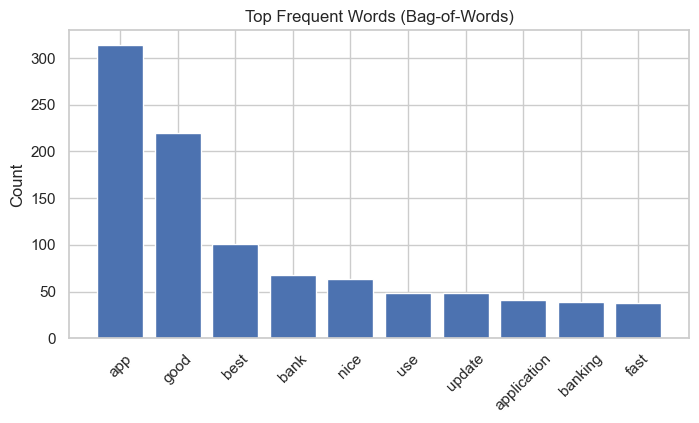

In [13]:
# Cell 8: Plot top frequent words (Frequency-Based)

top_n = 10
top_freq = freq_df.head(top_n)

plt.bar(top_freq["word"], top_freq["count"])
plt.xticks(rotation=45)
plt.title("Top Frequent Words (Bag-of-Words)")
plt.ylabel("Count")
plt.show()


TF-IDF representation

In [14]:
# Cell 9: TF-IDF representation

tfidf_vec = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf_vec.fit_transform(df["clean_text"])

# Get average TF-IDF score per word across documents
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).flatten()
vocab_tfidf = np.array(tfidf_vec.get_feature_names_out())

tfidf_df = pd.DataFrame({"word": vocab_tfidf, "tfidf": tfidf_means})
tfidf_df = tfidf_df.sort_values("tfidf", ascending=False)
tfidf_df.head(10)


,word,tfidf
504,good,0.161430
103,app,0.087780
175,best,0.060156
745,nice,0.045947
407,excellent,0.026735
156,bank,0.021535
426,fast,0.018099
1143,use,0.015426
109,application,0.014994
83,amazing,0.014521


TF-IDF (Very Brief Explanation)

TF-IDF shows how important a word is in the dataset.

TF (Term Frequency): how often a word appears.

IDF (Inverse Document Frequency): how unique the word is across all reviews.

TF-IDF = TF × IDF

Higher TF-IDF = more meaningful word.
Lower TF-IDF = common or unimportant word.

✔ What is a good TF-IDF number?

No universal scale — it’s relative.
But generally in small datasets:

> 0.10 = very important

0.05–0.10 = meaningful

< 0.05 = low importance

 Interpretation of our output

“app” (0.1099) → highly important theme

“slow”, “crashing”, “frustrating” → key negative issues

“options”, “good”, “works” → meaningful topics in reviews

Compare TF-IDF vs raw frequency

In [15]:
# Cell 10: Compare top words by frequency and by TF-IDF

print("Top 10 by raw frequency:")
display(freq_df.head(10))

print("\nTop 10 by TF-IDF (words more unique / informative):")
display(tfidf_df.head(10))


Top 10 by raw frequency:


,word,count
103,app,314
504,good,220
175,best,101
156,bank,68
745,nice,63
1143,use,48
1132,update,48
109,application,41
158,banking,39
426,fast,38



Top 10 by TF-IDF (words more unique / informative):


,word,tfidf
504,good,0.161430
103,app,0.087780
175,best,0.060156
745,nice,0.045947
407,excellent,0.026735
156,bank,0.021535
426,fast,0.018099
1143,use,0.015426
109,application,0.014994
83,amazing,0.014521


Topic Modeling (LDA)

In [16]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Tokenize text (very simple split for demo)
df["tokens"] = df["clean_text"].str.split()

# Create dictionary and corpus for LDA
dictionary = Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]


In [17]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (only first time)
nltk.download('stopwords')
df["tokens"] = df["clean_text"].astype(str).str.split()

stop_words = set(stopwords.words("english"))
# Remove stopwords from your tokenized text
df["tokens_nostop"] = df["tokens"].apply(
    lambda words: [w for w in words if w not in stop_words]
)

df[["clean_text", "tokens", "tokens_nostop"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_text,tokens,tokens_nostop
0,good,[good],[good]
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,"[አስደናቂ, ነው, ቀላለ, ምቹ, ፈጣን, እና, አካታች, ነው።, ከዚህ, ...","[አስደናቂ, ነው, ቀላለ, ምቹ, ፈጣን, እና, አካታች, ነው።, ከዚህ, ..."
2,good,[good],[good]
3,good,[good],[good]
4,very useful and attractive app !,"[very, useful, and, attractive, app, !]","[useful, attractive, app, !]"


In [18]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
dictionary = Dictionary(df["tokens_nostop"])
# Use stopword-cleaned tokens
dictionary = Dictionary(df["tokens_nostop"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens_nostop"]]


lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10,
    random_state=42
)


In [25]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,   # change number of topics if needed
    passes=10,
    random_state=42)
topics = lda_model.show_topics(num_topics=2, num_words=10, formatted=False)

for i, topic in topics:
    print(f"\n--- Topic {i+1} ---")
    for word, weight in topic:
        print(f"{word:15s}  weight={weight:.4f}")



--- Topic 1 ---
app              weight=0.0506
super            weight=0.0299
everything       weight=0.0299
tap              weight=0.0299
need             weight=0.0299
away.            weight=0.0299
use              weight=0.0299
easy             weight=0.0299
exceptional      weight=0.0298
product,         weight=0.0298

--- Topic 2 ---
always           weight=0.0462
options          weight=0.0280
payment          weight=0.0277
services.        weight=0.0277
limited,         weight=0.0277
add              weight=0.0277
please           weight=0.0277
bill             weight=0.0277
updating,        weight=0.0277
frustrating!     weight=0.0277


Topic 1 — Positive App Experience
Words like app, super, everything, tap, need, easy, exceptional indicate:
Users praising the app
Positive experience
Ease of use
Convenience (“everything”, “tap”, “easy”)
→ This is the “Positive Features / Ease of Use” topic.
Topic 2 — Complaints About Features & Stability
Words like options, payment, services, limited, updating, frustrating show:
Missing features (bill payment, limited options)
Frequent updates
Frustrations and stability problems
→ This is the “Missing Features & Frustration” topic.

Part-of-Speech Tagging (Noun Extraction)

In [19]:
import spacy
import en_core_web_sm

# Load the model THIS WAY (fixes the error)
nlp = en_core_web_sm.load()

def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "NOUN"]

df["nouns"] = df["review_text"].astype(str).apply(extract_nouns)

df[["review_text", "nouns"]].head()


,review_text,nouns
0,good,[]
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,[]
2,Good,[]
3,good,[]
4,Very Useful and attractive app !,[app]


2 – Lexicon-Based Sentiment (TextBlob & VADER)

TextBlob sentiment

In [20]:
# Cell 11: Lexicon-based sentiment with TextBlob
# Polarity in [-1, 1], subjectivity in [0, 1]

# Get polarity and subjectivity
df["tb_polarity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["tb_subjectivity"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert polarity → sentiment label
def polarity_to_label(p):
    if p > 0.1:
        return "positive"
    elif p < -0.1:
        return "negative"
    else:
        return "neutral"

df["tb_sentiment"] = df["tb_polarity"].apply(polarity_to_label)

# Show output
df[["review_text", "rating", "tb_polarity", "tb_subjectivity", "tb_sentiment"]]


,review_text,rating,tb_polarity,tb_subjectivity,tb_sentiment
0,good,5,0.700000,0.60000,positive
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,0.000000,0.00000,neutral
2,Good,5,0.700000,0.60000,positive
3,good,5,0.700000,0.60000,positive
4,Very Useful and attractive app !,5,0.695000,0.50000,positive
...,...,...,...,...,...
978,This application is excellent .,5,1.000000,1.00000,positive
979,The new update is very bugged. can't view the ...,1,-0.070996,0.45303,neutral
980,very good,5,0.910000,0.78000,positive
981,Thise App is Great,5,0.800000,0.75000,positive


VADER sentiment

In [21]:
# Cell 12: Lexicon-based sentiment with VADER
# VADER is optimized for reviews, slang, emojis, and short texts

def vader_compound(text):
    return sia.polarity_scores(text)["compound"]

# VADER compound score
df["vader_compound"] = df["review_text"].apply(vader_compound)

# Convert compound score → sentiment label
# Standard VADER rule:
# compound >= 0.05 → positive
# compound <= -0.05 → negative
# otherwise → neutral

def vader_label(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_sentiment"] = df["vader_compound"].apply(vader_label)

# Show output
df[["review_text", "rating", "tb_polarity", "vader_compound", "vader_sentiment"]]


,review_text,rating,tb_polarity,vader_compound,vader_sentiment
0,good,5,0.700000,0.4404,positive
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,0.000000,0.0000,neutral
2,Good,5,0.700000,0.4404,positive
3,good,5,0.700000,0.4404,positive
4,Very Useful and attractive app !,5,0.695000,0.7683,positive
...,...,...,...,...,...
978,This application is excellent .,5,1.000000,0.5719,positive
979,The new update is very bugged. can't view the ...,1,-0.070996,0.0000,neutral
980,very good,5,0.910000,0.4927,positive
981,Thise App is Great,5,0.800000,0.6249,positive


visualization of lexicon scores vs rating

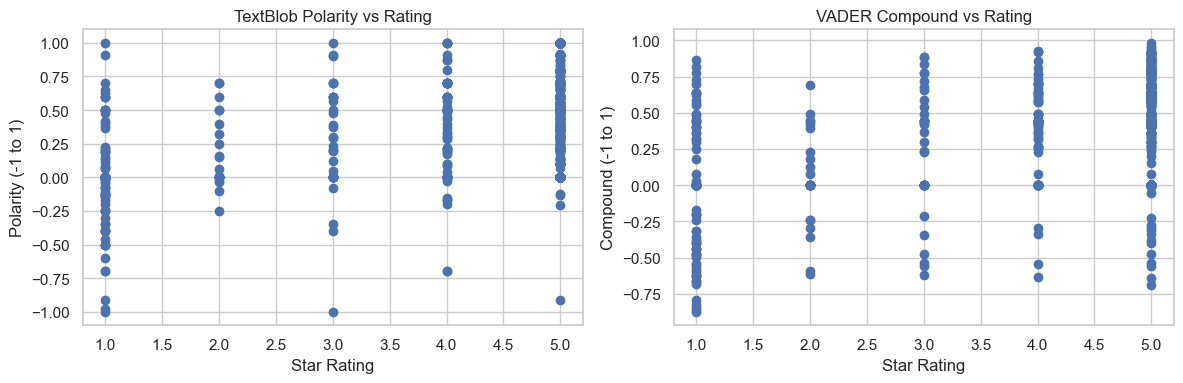

In [22]:
# Cell 13: See how lexicon scores correlate with star rating

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["rating"], df["tb_polarity"])
axes[0].set_title("TextBlob Polarity vs Rating")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("Polarity (-1 to 1)")

axes[1].scatter(df["rating"], df["vader_compound"])
axes[1].set_title("VADER Compound vs Rating")
axes[1].set_xlabel("Star Rating")
axes[1].set_ylabel("Compound (-1 to 1)")

plt.tight_layout()
plt.show()


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm.auto import tqdm

# model name
model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

# load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Model loaded on", device)


: 

Task 3: Store Cleaned Data in PostgreSQL


In [3]:
!pip install psycopg2-binary --quiet
import psycopg2
conn = psycopg2.connect(
    dbname="bank_reviews",
    user="postgres",
    password="4525",
    host="localhost",
    port="5432"
)
cur = conn.cursor()
print("Connected!")



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  database "bank_reviews" does not exist


In [2]:
cur.execute("""
CREATE TABLE IF NOT EXISTS banks (
    bank_id SERIAL PRIMARY KEY,
    bank_name VARCHAR(100),
    app_name VARCHAR(150)
);

CREATE TABLE IF NOT EXISTS reviews (
    review_id SERIAL PRIMARY KEY,
    bank_id INT REFERENCES banks(bank_id),
    review_text TEXT,
    rating INT,
    review_date DATE,
    sentiment_label VARCHAR(20),
    sentiment_score FLOAT,
    source VARCHAR(50)
);
""")
conn.commit()
print("Tables created.")


NameError: name 'cur' is not defined

In [ ]:
banks = df["bank"].unique()
for b in banks:
    cur.execute("INSERT INTO banks (bank_name, app_name) VALUES (%s, %s)", (b, f"{b} App"))
conn.commit()
print("Banks inserted.")


In [ ]:
cur.execute("SELECT bank_id, bank_name FROM banks")
bank_map = {name: id for id, name in cur.fetchall()}

for _, row in df.iterrows():
    cur.execute("""
        INSERT INTO reviews 
        (bank_id, review_text, rating, review_date, sentiment_label, sentiment_score, source)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, (
        bank_map[row["bank"]],
        row["review"],
        row["rating"],
        row["date"],
        row["sentiment_label"],
        row["sentiment_score"],
        row["source"]
    ))

conn.commit()
print("Reviews inserted.")


In [ ]:
cur.execute("SELECT bank_name, COUNT(*) FROM reviews JOIN banks USING(bank_id) GROUP BY bank_name;")
print(cur.fetchall())


In [ ]:
cur.close()
conn.close()
